In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept of AI -- Assement/Classification/global_air_pollution_data.csv')

**EDA**

In [67]:
# Display rows and column in the dataset
print(f"Shape Of The Dataset: {df.shape}")

Shape Of The Dataset: (23035, 12)


In [46]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [47]:
# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               51    

In [48]:
# Display the last few rows
print("\Last few rows of the dataset:")
print(df.tail())

\Last few rows of the dataset:
                   country_name     city_name  aqi_value aqi_category  \
23458                     India  Gursahaiganj        184    Unhealthy   
23459                    France        Sceaux         50         Good   
23460                     India      Mormugao         50         Good   
23461  United States of America   Westerville         71     Moderate   
23462                  Malaysia        Marang         70     Moderate   

       co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
23458               3            Good              154          Unhealthy   
23459               1            Good               20               Good   
23460               1            Good               22               Good   
23461               1            Good               44               Good   
23462               1            Good               38               Good   

       no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_ca

In [ ]:
# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handling missing values
df = df.dropna()


Missing values:
country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64


In [50]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  23035.000000    23035.000000     23035.000000   23035.000000   
mean      72.344693        1.376254        35.233905       3.084741   
std       56.360992        1.844926        28.236613       5.281708   
min        6.000000        0.000000         0.000000       0.000000   
25%       39.000000        1.000000        21.000000       0.000000   
50%       55.000000        1.000000        31.000000       1.000000   
75%       80.000000        1.000000        40.000000       4.000000   
max      500.000000      133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23035.000000  
mean         68.883482  
std          55.057396  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [51]:
# Convert 'aqi_category' into binary classification
# Assuming 'Good' and 'Moderate' are 0 (Low pollution), others are 1 (High pollution)
binary_mapping = {'Good': 0, 'Moderate': 0, 'Unhealthy for Sensitive Groups': 1, 'Unhealthy': 1, 'Very Unhealthy': 1, 'Hazardous': 1}
df['aqi_category'] = df['aqi_category'].map(binary_mapping)

In [52]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()


Number of duplicate rows: 0


<ipython-input-53-10f3b20fc307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_column, palette='viridis')


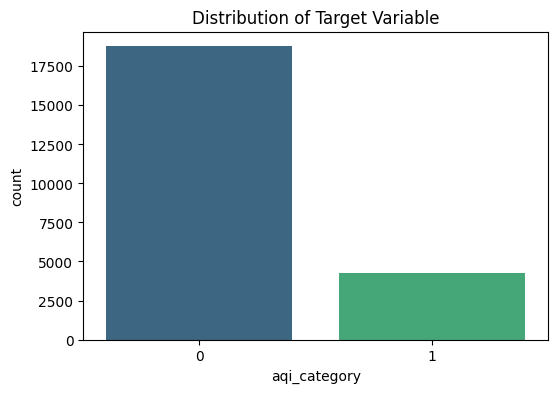

In [53]:
# Distribution of target variable
target_column = 'aqi_category'
if target_column in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=target_column, palette='viridis')
    plt.title('Distribution of Target Variable')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


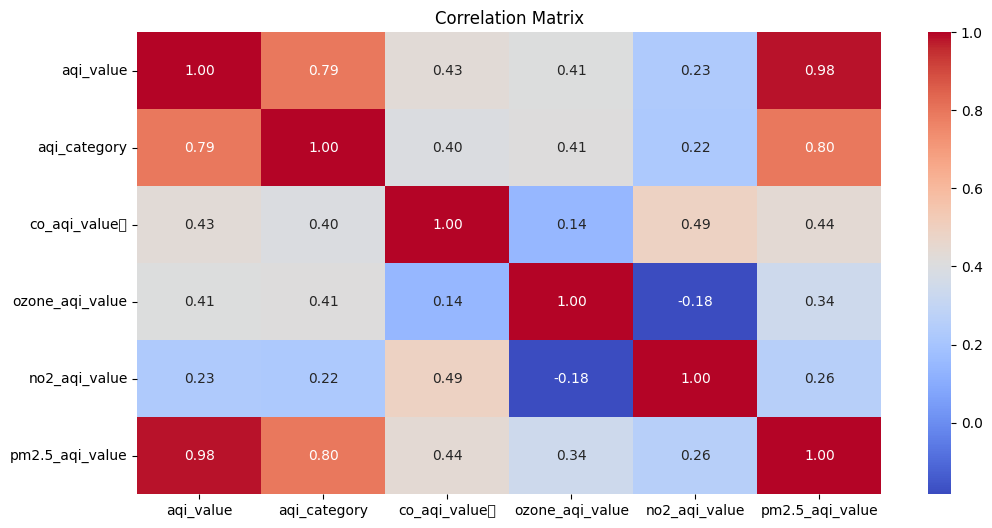

In [54]:
# Correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


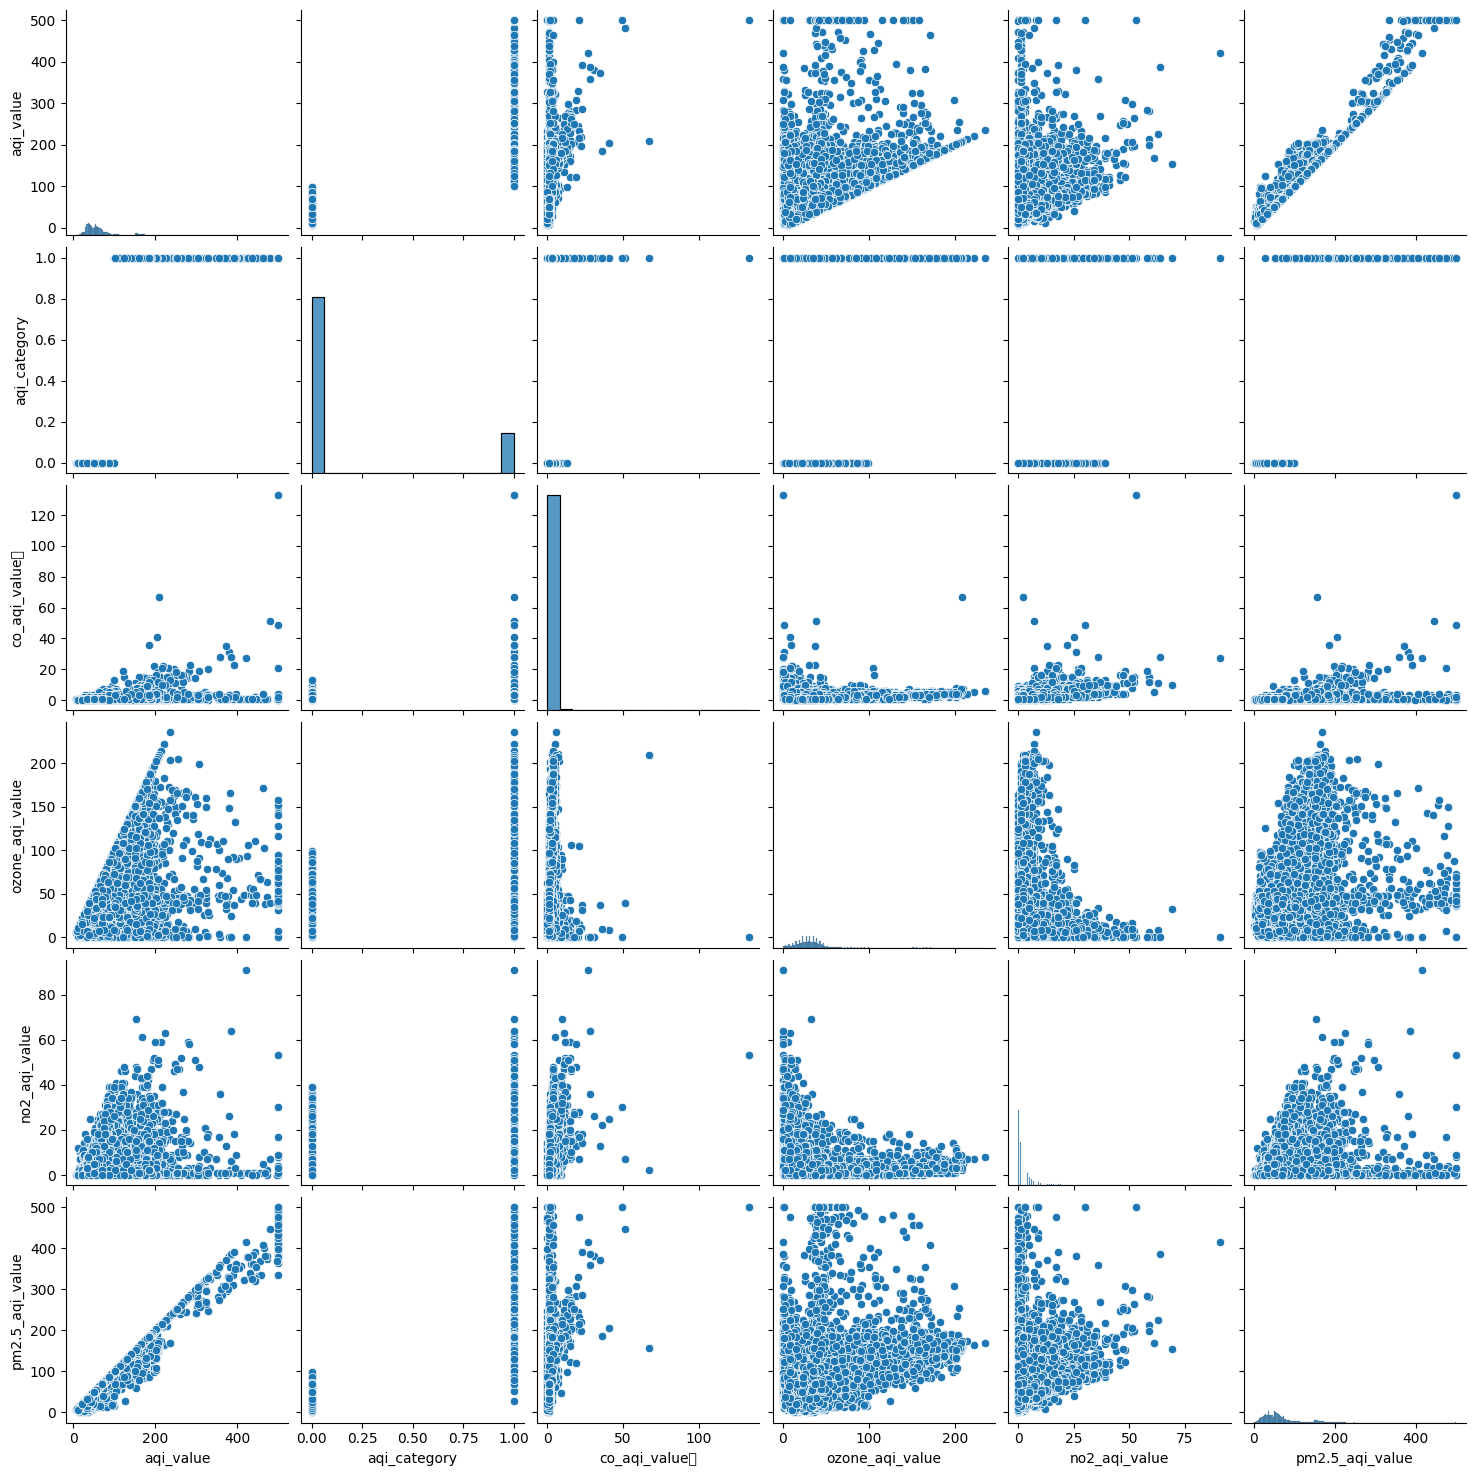

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


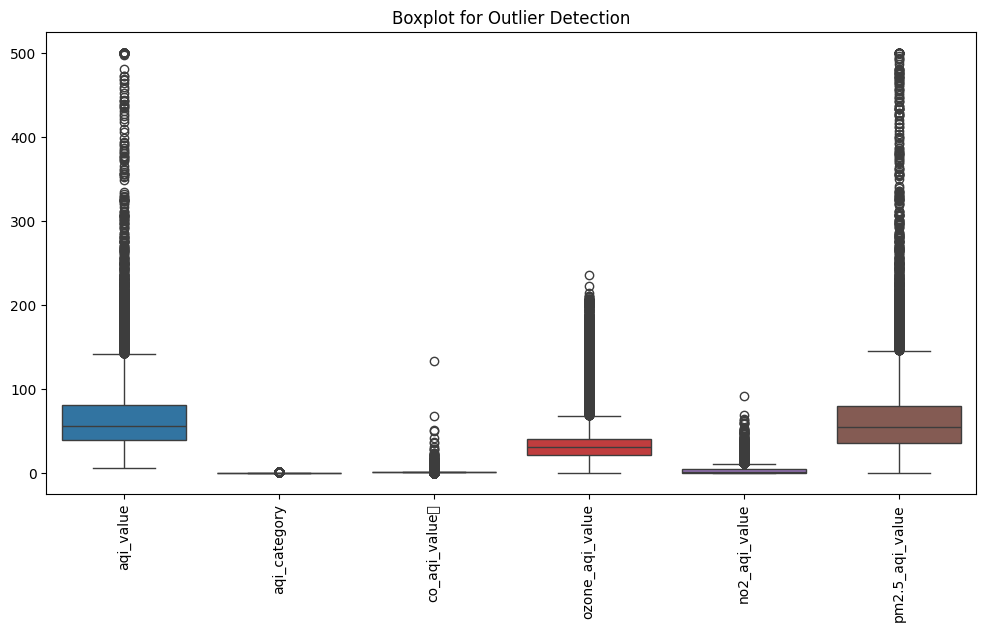

In [55]:
# Pairplot for numerical features
sns.pairplot(numeric_df)
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


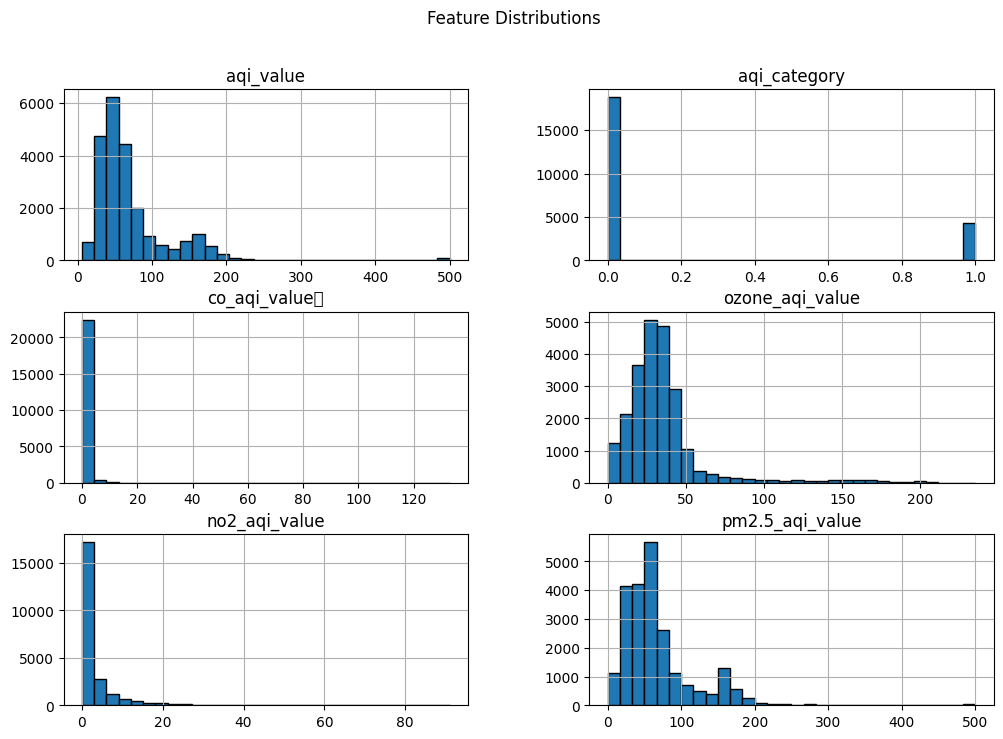


EDA Completed Successfully!


In [56]:
# Histogram for feature distribution
numeric_df.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

print("\nEDA Completed Successfully!")

In [57]:
# Encoding target variable
target_column = 'aqi_category'
if target_column in df.columns:
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])

# Selecting features and target
X = df.select_dtypes(include=['number']).drop(columns=[target_column])
y = df[target_column]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression from Scratch**

In [58]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Training the model
model = LogisticRegressionScratch()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
print("\nTrain Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

print("\nLogistic Regression Model Training and Evaluation Completed Successfully!")



Train Accuracy: 0.9814412850010853
Test Accuracy: 0.9811156935098763

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3767
           1       0.98      0.91      0.95       840

    accuracy                           0.98      4607
   macro avg       0.98      0.95      0.97      4607
weighted avg       0.98      0.98      0.98      4607


Confusion Matrix:
 [[3753   14]
 [  73  767]]

Logistic Regression Model Training and Evaluation Completed Successfully!


**Primary Model**

In [59]:
# Training and Evaluating Logistic Regression from Scratch
model_scratch = LogisticRegressionScratch()
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)
print("\nScratch Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scratch))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_scratch))

# Training and Evaluating Scikit-learn Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("\nScikit-learn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Training and Evaluating Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Conclusion: Identifying Best Model
models = {"Scratch Logistic Regression": accuracy_score(y_test, y_pred_scratch),
          "Scikit-learn Logistic Regression": accuracy_score(y_test, y_pred_lr),
          "Random Forest Classifier": accuracy_score(y_test, y_pred_rf)}

best_model = max(models, key=models.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {models[best_model]:.4f}")
print("\nModel Training and Evaluation Completed Successfully!")



Scratch Logistic Regression Accuracy: 0.9811156935098763

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3767
           1       0.98      0.91      0.95       840

    accuracy                           0.98      4607
   macro avg       0.98      0.95      0.97      4607
weighted avg       0.98      0.98      0.98      4607


Confusion Matrix:
 [[3753   14]
 [  73  767]]

Scikit-learn Logistic Regression Accuracy: 0.9982635120468851

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       1.00      0.99      1.00       840

    accuracy                           1.00      4607
   macro avg       1.00      1.00      1.00      4607
weighted avg       1.00      1.00      1.00      4607


Confusion Matrix:
 [[3766    1]
 [   7  833]]

Random Forest Classifier Accuracy: 1.0

Classification Report:
               pr

**Hyper-parameter Optimization with Cross-Validation**

In [69]:
# Hyperparameter Optimization for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("\nBest Logistic Regression Parameters:", grid_search_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_search_lr.best_score_)

# Hyperparameter Optimization for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Accuracy:", grid_search_rf.best_score_)

# Conclusion: Identifying Best Model
models = {"Scikit-learn Logistic Regression": accuracy_score(y_test, y_pred_lr),
          "Random Forest Classifier": accuracy_score(y_test, y_pred_rf)}

best_model = max(models, key=models.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {models[best_model]:.4f}")
print("\nHyperparameter Tuning Completed Successfully!")


Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.99929458415023

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy: 1.0

Best Performing Model: Random Forest Classifier with Accuracy: 1.0000

Hyperparameter Tuning Completed Successfully!


**Feature Selection**

In [61]:
# Feature Selection using Random Forest Feature Importance
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)
feature_importances = rf_selector.feature_importances_
feature_names = X.columns

# Sorting features by importance
important_features = sorted(zip(feature_importances, feature_names), reverse=True)
print("\nFeature Importance Ranking:")
for importance, feature in important_features:
    print(f"{feature}: {importance:.4f}")

# Selecting top features
num_top_features = 5  # Choose top 5 most important features
selected_features = [feature for _, feature in important_features[:num_top_features]]
print("\nSelected Features:", selected_features)

# Redefining X with selected features
X = df[selected_features]

# Splitting data again with selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing selected features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Evaluating Scikit-learn Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("\nScikit-learn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Training and Evaluating Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Hyperparameter Optimization for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("\nBest Logistic Regression Parameters:", grid_search_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_search_lr.best_score_)

# Hyperparameter Optimization for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Accuracy:", grid_search_rf.best_score_)

# Conclusion: Identifying Best Model
models = {"Scikit-learn Logistic Regression": accuracy_score(y_test, y_pred_lr),
          "Random Forest Classifier": accuracy_score(y_test, y_pred_rf)}

best_model = max(models, key=models.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {models[best_model]:.4f}")
print("\nFeature Selection and Model Training Completed Successfully!")



Feature Importance Ranking:
aqi_value: 0.4946
pm2.5_aqi_value: 0.4131
co_aqi_value	: 0.0593
ozone_aqi_value: 0.0328
no2_aqi_value: 0.0002

Selected Features: ['aqi_value', 'pm2.5_aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value']

Scikit-learn Logistic Regression Accuracy: 0.9982635120468851

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       1.00      0.99      1.00       840

    accuracy                           1.00      4607
   macro avg       1.00      1.00      1.00      4607
weighted avg       1.00      1.00      1.00      4607


Confusion Matrix:
 [[3766    1]
 [   7  833]]

Random Forest Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       1.00      1.00      1.00       840

    accuracy                           1.00      4607
   macro 

**Final** **Model**

In [68]:
# Rebuilding Final Logistic Regression Model with Best Parameters
best_lr = LogisticRegression(**grid_search_lr.best_params_)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
print("\nFinal Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Rebuilding Final Random Forest Model with Best Parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
print("\nFinal Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Conclusion: Identifying Best Model
models = {"Final Logistic Regression": accuracy_score(y_test, y_pred_lr),
          "Final Random Forest": accuracy_score(y_test, y_pred_rf)}

best_model = max(models, key=models.get)
print(f"\nBest Performing Final Model: {best_model} with Accuracy: {models[best_model]:.4f}")
print("\nFinal Model Training and Evaluation Completed Successfully!")


Final Logistic Regression Accuracy: 0.9995658780117213

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       1.00      1.00      1.00       840

    accuracy                           1.00      4607
   macro avg       1.00      1.00      1.00      4607
weighted avg       1.00      1.00      1.00      4607


Confusion Matrix:
 [[3766    1]
 [   1  839]]

Final Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       1.00      1.00      1.00       840

    accuracy                           1.00      4607
   macro avg       1.00      1.00      1.00      4607
weighted avg       1.00      1.00      1.00      4607


Confusion Matrix:
 [[3767    0]
 [   0  840]]

Best Performing Final Model: Final Random Forest with Accuracy: 1.0000

Final Model Training and Evaluation Co